In [1]:
import numpy as np
import pandas as pd
import h5py
import random
import math
import matplotlib.pyplot as plt

In [2]:
def loadBGRImage(path):
    image = BGR(cv.imread(path))
    return image

def loadGreyImage(path):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    return image

def BGR(image):
    image = cv.cvtColor(image,cv.COLOR_RGB2BGR)
    return image

def displayGreyImage(image,imageName):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap='gray')
    plt.title(imageName)
    plt.show()
def displayGreyWindows(image,imageName):
    plt.figure(figsize=(3,3))
    plt.imshow(image, cmap='gray')
    plt.title(imageName)
    plt.show()
    
def displayBGRImage(image,imageName, size):
    plt.figure(figsize=(size,size))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def displayBGRImageLarge(image,imageName):
    plt.figure(figsize=(18,18))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def imageSideBySide(images,imageNames,size):
    row = np.ceil(len(images)/3)
    fig=plt.figure(figsize=(size, size))
    for i,image in enumerate(images):
        fig.add_subplot(row,3,i+1)
        plt.imshow(image, cmap='gray')
        plt.title("")
        #plt.title(imageNames[i])
    plt.show()

    

In [3]:
start = 25,26
size = 14,12
f = h5py.File('MNIST_synthetic.h5', 'r')
list(f.keys())

['test_dataset', 'train_dataset', 'train_labels']

/Users/marcoguida/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


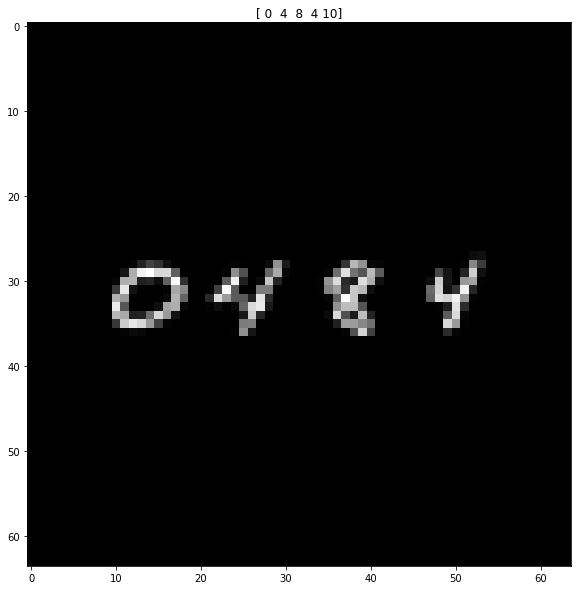

In [4]:
displayGreyImage(np.squeeze(np.array(f["train_dataset"]))[7],np.squeeze(f["train_labels"])[7])

In [5]:
print(np.squeeze(f["train_labels"])[3])
train_dataset = np.squeeze(np.array(f["train_dataset"])).copy()
train_labels = np.squeeze(np.array(f["train_labels"])).copy()

singulars_digit_list = []
singulars_label_list = []
for i, labels in enumerate(train_labels):
    if labels[1]==10:
        singulars_digit_list.append(train_dataset[i])
        singulars_label_list.append(train_labels[i])

[ 5  2  6 10 10]


In [6]:
singulars_digit = np.array(singulars_digit_list)     
print(len(train_dataset))
print(singulars_digit.shape)
print(len(singulars_label_list))

singulars_label = np.array(singulars_label_list).T[0]
for number in range(10):
    print(f"Amount of {number}: {list(singulars_label).count(number)}")

56000
(11247, 64, 64)
11247
Amount of 0: 1068
Amount of 1: 1214
Amount of 2: 1199
Amount of 3: 1184
Amount of 4: 1079
Amount of 5: 1017
Amount of 6: 1108
Amount of 7: 1222
Amount of 8: 1103
Amount of 9: 1053


In [7]:
print(singulars_digit)
print(singulars_label)

# 5-fold cross validation for digits dataset

digitsTrainingSetSize = int(np.ceil(0.8 * len(singulars_digit)))
digitsValidationSetSize = int(len(singulars_digit) - digitsTrainingSetSize)

print(digitsTrainingSetSize)
print(digitsValidationSetSize)

xDigitsTrainingSets = []
yDigitsTrainingSets = []
xDigitsValidationSets = []
yDigitsValidationSets = []

for foldIndex in range(5):

    xValidationSet = []
    yValidationSet = []
    
    print("hello",xValidationSet)

    for index, data in enumerate(singulars_digit[foldIndex*digitsValidationSetSize:((foldIndex*digitsValidationSetSize)+digitsValidationSetSize)]):
        xValidationSet.append(data.tolist())
        yValidationSet.append(singulars_label[index+(foldIndex*digitsValidationSetSize)])

    xTrainingSet = []
    yTrainingSet = []

    for index, data in enumerate(singulars_digit.tolist()):
        if data not in xValidationSet:
            xTrainingSet.append(data)
            yTrainingSet.append(singulars_label[index])

    xDigitsTrainingSets.append(xTrainingSet)
    yDigitsTrainingSets.append(yTrainingSet)
    xDigitsValidationSets.append(xValidationSet)
    yDigitsValidationSets.append(yValidationSet)
        
print(xDigitsTrainingSets[0])
print(yDigitsTrainingSets[0])
print(xDigitsValidationSets[0])
print(yDigitsValidationSets[0])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[2 5 7 ... 8 2 6]
8998
2249
hello []
hello []
hello []
hello []
hello []


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



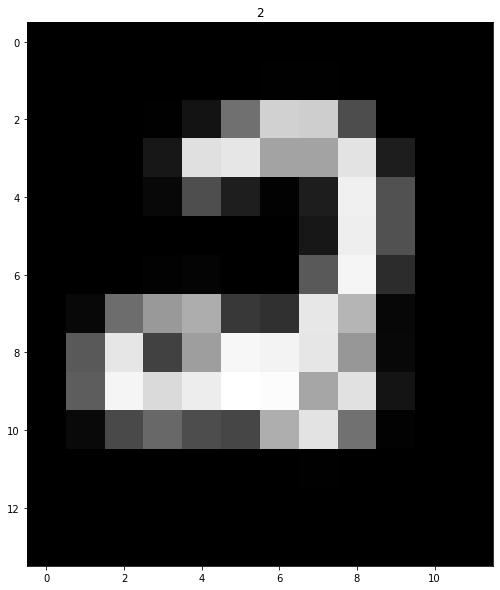

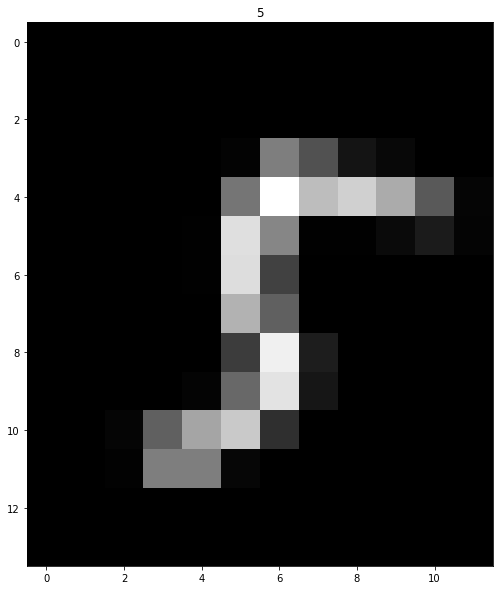

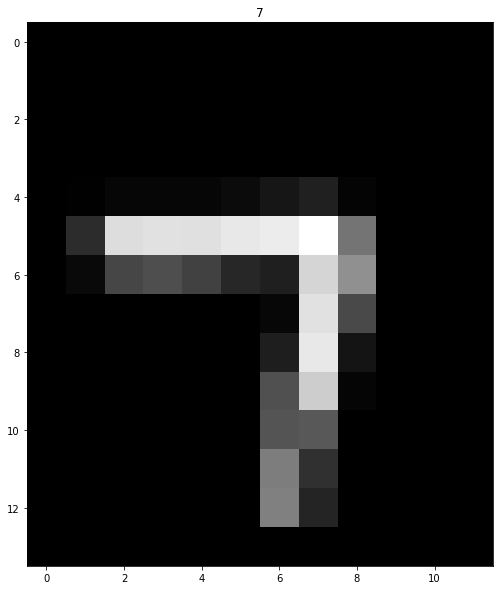

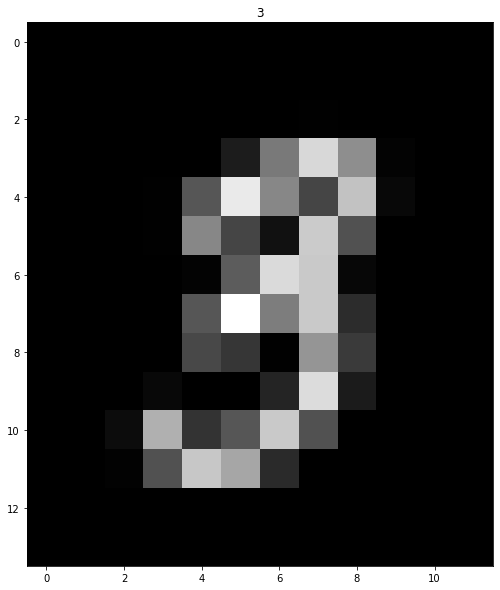

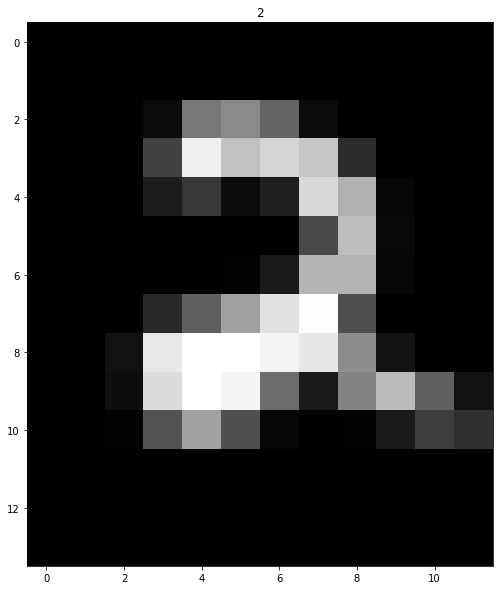

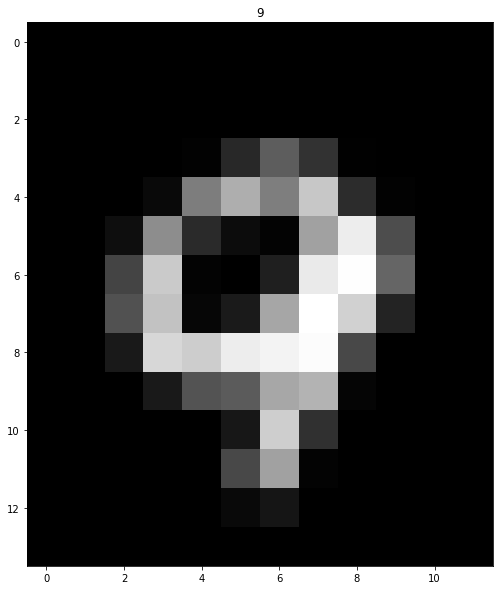

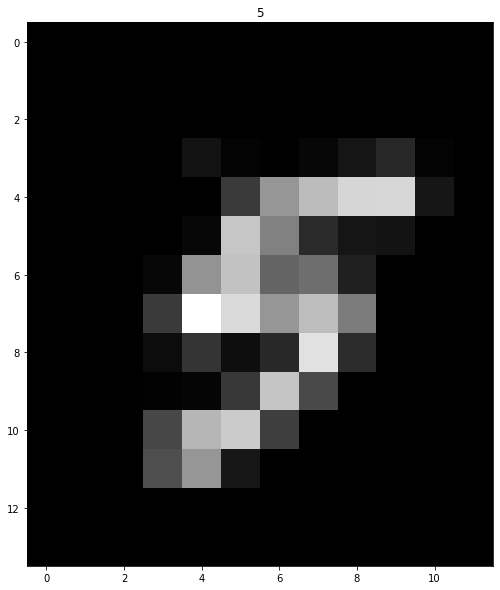

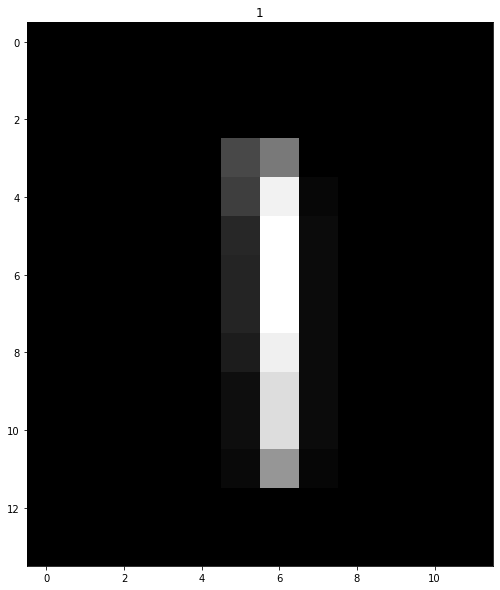

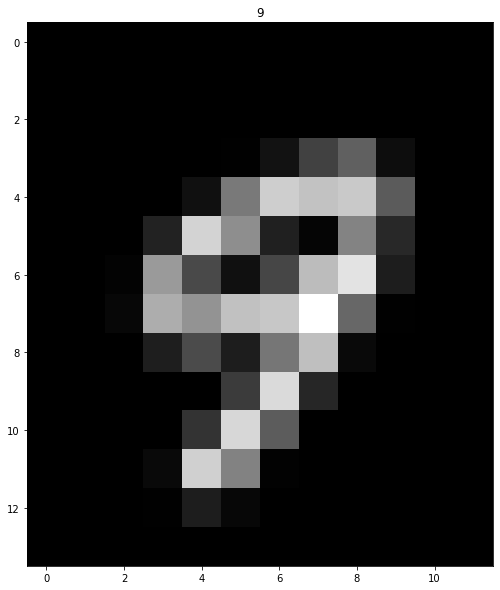

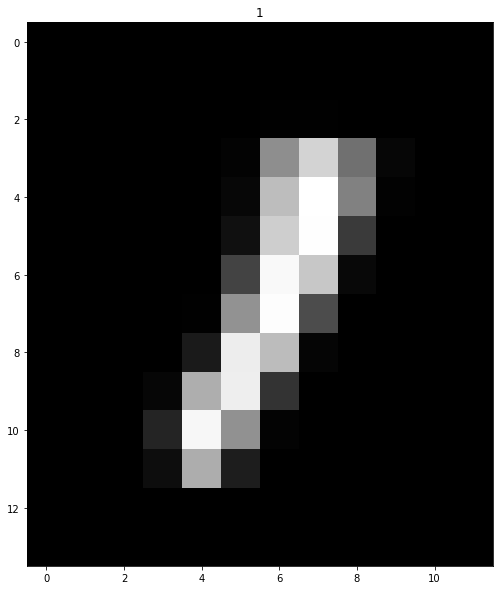

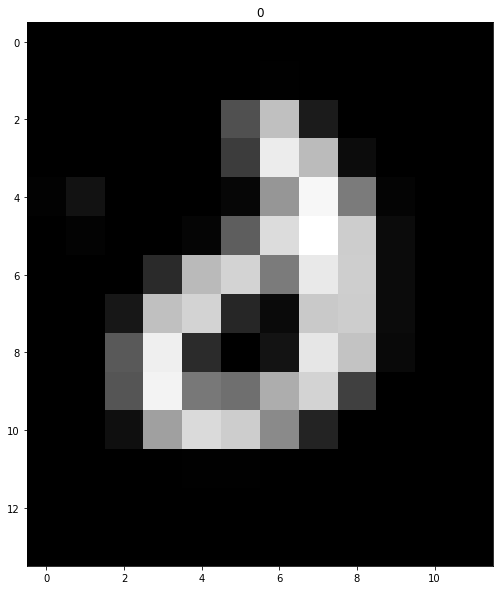

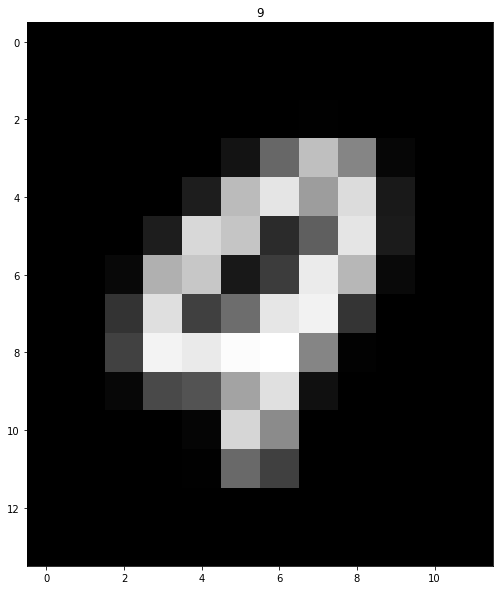

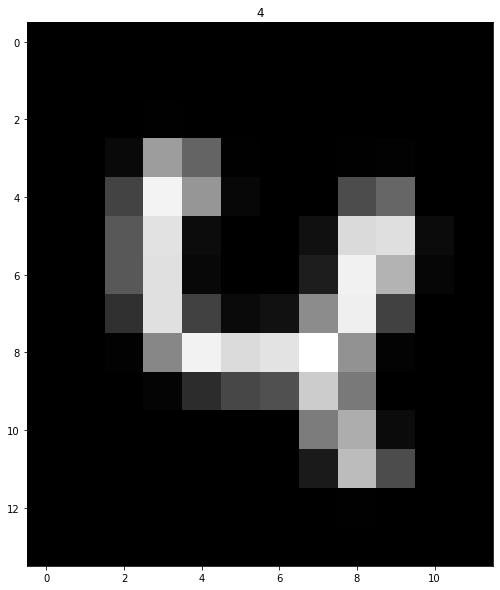

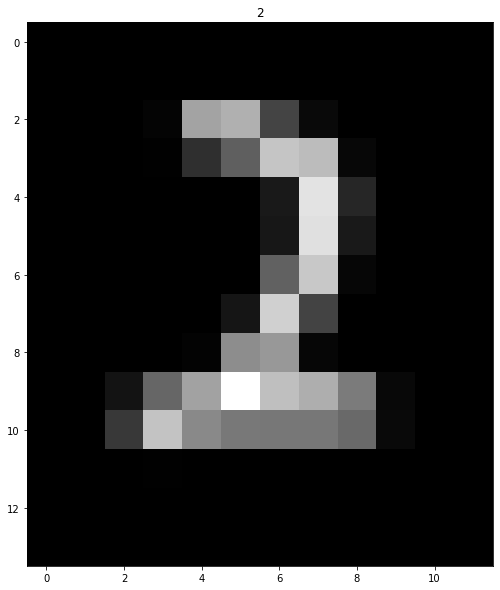

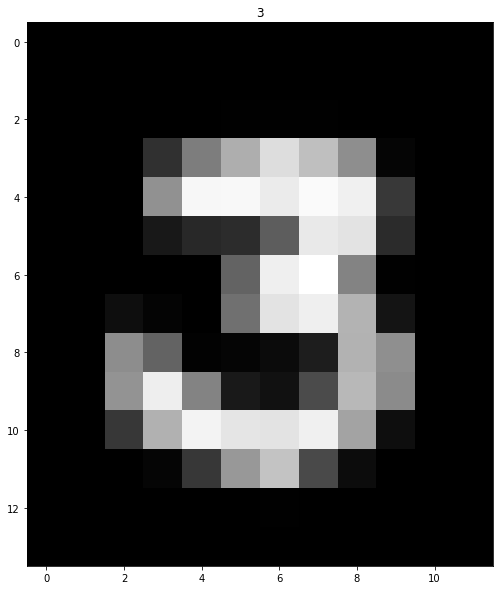

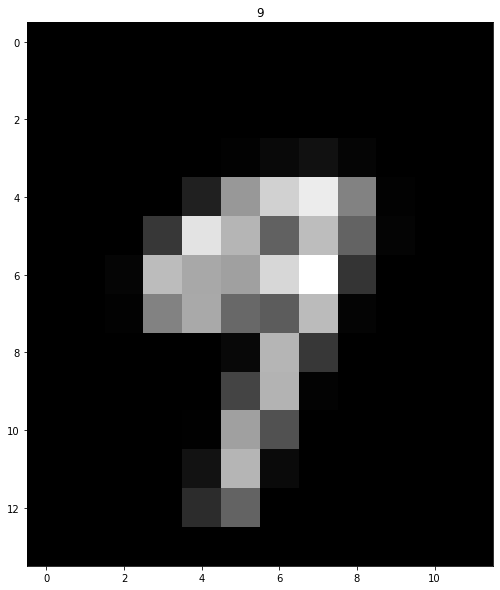

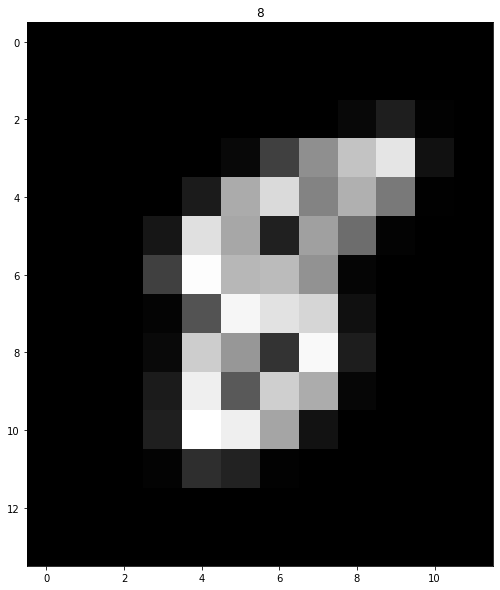

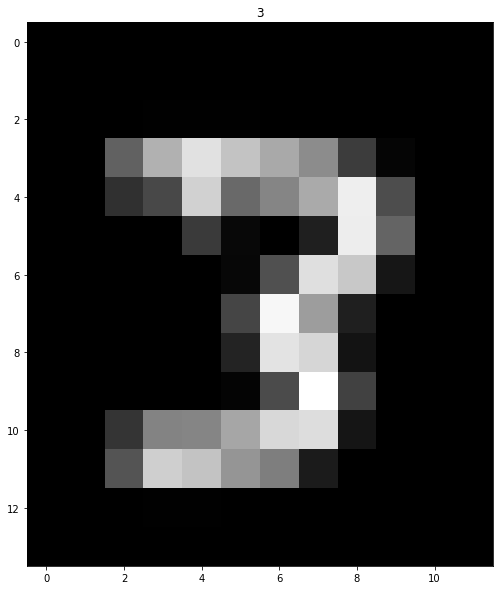

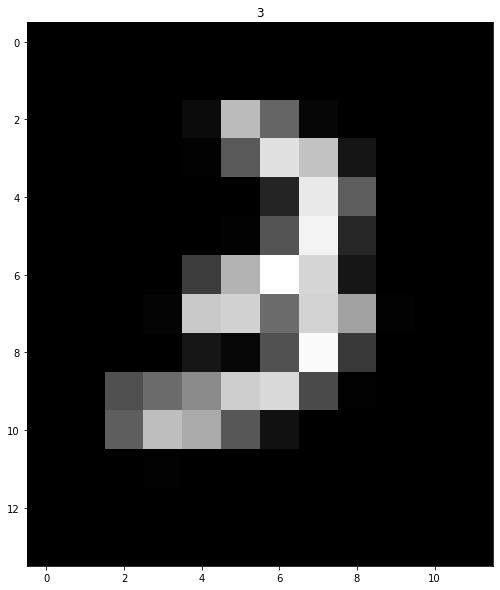

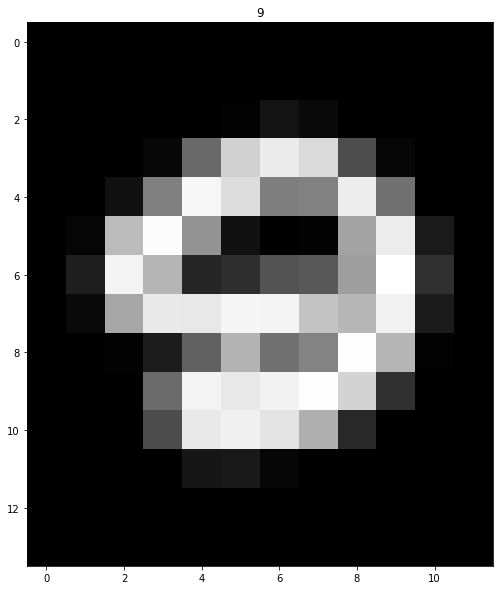

In [8]:
singular_dataset_focus = []
for i, digit in enumerate(singulars_digit):
    singular_dataset_focus.append(digit[25:39,26:38])

for i in range(20):
    displayGreyImage(singular_dataset_focus[i],singulars_label[i])
    

In [9]:
    
def make_windows(img,size):
    #border_patrol = int((size-1)/2)
    
    img_pad = img.copy()#img_pad = np.pad(img.copy(), ((border_patrol,border_patrol),(border_patrol,border_patrol)))   #pad image by the extra border to get zeros in the pixels surrounding the image
    l,w = img.shape
    windows95 = np.zeros(w-size[1],dtype=object)
    for i, row in enumerate(windows95):
            windows95[i] = img_pad[25:25+size[0],i:i+size[1]]                    #make image windows and insert them at the center i,j of the windows bitmap
    return windows95



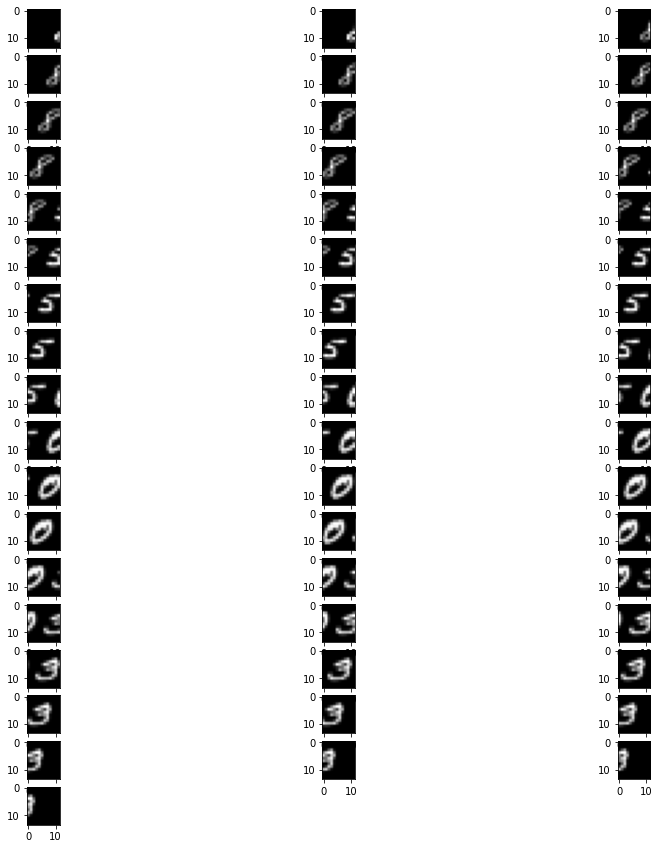

In [10]:
array = make_windows(train_dataset[0],(14,12))
imageSideBySide(array,"",15)


